# Benchmark network inference

Time PIDC network inference for datasets with different numbers of genes, and plot the results.

## More details
Data are generated randomly for this test, since timings depend on the number of calculations, rather than the nature of the data. The number of calculations is related to the number of _bins_ when the data are discretized, rather than the number of cells. The number of cells affects the time to infer a network only by affecting the number of bins.

Using the recommended Bayesian blocks discretization algorithm, the number of bins only changes slightly according to the distribution of the data and the number of data points. Using uniform width discretization, the number of bins can be specified in advance, but by default is roughly the square root of the number of data points. Therefore, for datasets with many cells, network inference will take a lot longer if the data are discretized by uniform width with the default number of bins.

This script only times the network inference part of the task, not the data discretization (which is only performed once for each gene, so scales differently). For timings related to discretization, see __Benchmark discretization__.

In [1]:
# Uncomment to make use of parallel processes:
# addprocs(4)

4-element Array{Int64,1}:
 2
 3
 4
 5

In [1]:
# Include packages

using NetworkInference
using InformationMeasures
using PyPlot

include("../helper_functions.jl")

get_times_per_number_of_cells (generic function with 1 method)

In [2]:
# Customize options (defaults are consistent with Fig. 7C)

algorithm = PIDCNetworkInference()
discretizer = "bayesian_blocks"
number_of_cells = 700
min_number_of_genes = 100
max_number_of_genes = 1000
step = 100;

In [3]:
# Time network inference
sizes, times = get_times_per_number_of_genes(algorithm, discretizer, number_of_cells, min_number_of_genes, max_number_of_genes, step)

Generating data...
Storing data as Genes..
Timing network inference...
-------------
10 genes:
3.940180452 s
-------------
20 genes:
0.028696549 s
-------------
30 genes:
0.068878055 s
-------------
40 genes:
0.157464344 s
-------------
50 genes:
0.177966192 s
-------------
60 genes:
0.261396841 s
-------------
70 genes:
0.363701446 s
-------------
80 genes:
0.477827709 s
-------------
90 genes:
0.626789758 s
-------------
100 genes:
0.962501504 s


(Any[10, 20, 30, 40, 50, 60, 70, 80, 90, 100], Any[3.94018, 0.0286965, 0.0688781, 0.157464, 0.177966, 0.261397, 0.363701, 0.477828, 0.62679, 0.962502])

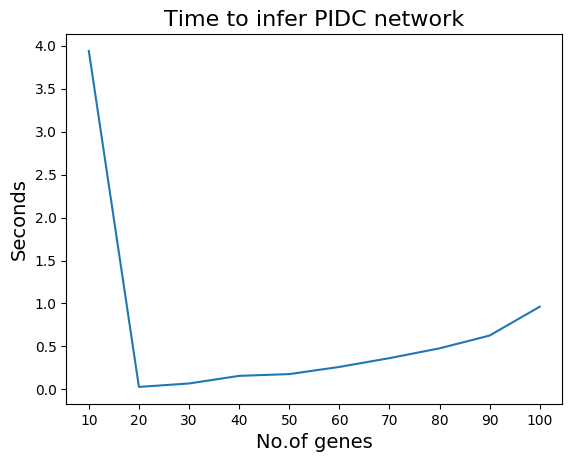

PyObject <matplotlib.text.Text object at 0x1325122d0>

In [7]:
# Plot times
plot(sizes, times)
plt[:xlabel]("No.of genes", fontsize = 14)
plt[:ylabel]("Seconds", fontsize = 14)
plt[:xticks](collect(min_number_of_genes:step:max_number_of_genes))
plt[:title]("Time to infer PIDC network", fontsize = 16)